# Complete Guide to Linear Regression

## Learning Objectives
By the end of this notebook, you will understand:
1. What linear regression is and when to use it
2. The mathematical theory behind linear regression
3. Closed-form solution (Normal Equation)
4. Gradient descent solution
5. Regularization (Ridge and Lasso)
6. Model evaluation and interpretation
7. Real-world applications and best practices

---

## 1. What is Linear Regression?

### The Core Idea

**Linear regression** models the relationship between input features and output values using a linear function.

**Simple form (one feature):**
$$y = wx + b$$

**General form (multiple features):**
$$y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

Or in vector notation:
$$\hat{y} = \mathbf{w}^T\mathbf{x} + b$$

### Real-World Examples:
- **House prices**: Predict price based on size, location, bedrooms
- **Sales forecasting**: Predict revenue based on advertising spend
- **Temperature prediction**: Predict temperature based on time, humidity
- **Salary estimation**: Predict salary based on experience, education

### Why Linear Regression?
- ✅ **Simple and interpretable**: Easy to understand and explain
- ✅ **Fast to train**: Closed-form solution exists
- ✅ **Works well**: Good baseline for many problems
- ✅ **Foundation**: Basis for many advanced techniques

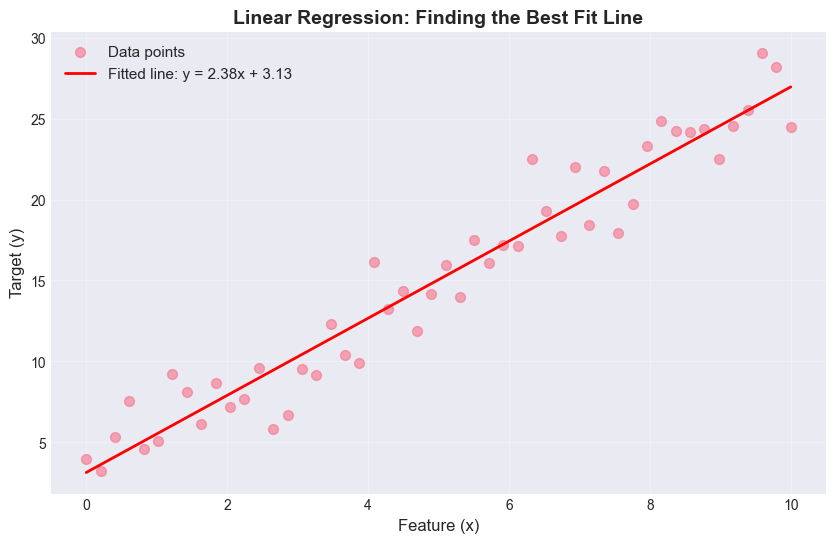

Linear Regression Goal:
Find the line (or hyperplane) that best fits the data

Fitted parameters: w = 2.38, b = 3.13
True parameters: w = 2.5, b = 3.0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

# Simple visualization
# Generate simple 1D data
X_simple = np.linspace(0, 10, 50)
y_simple = 2.5 * X_simple + 3 + np.random.randn(50) * 2

# Fit line
w = np.polyfit(X_simple, y_simple, 1)[0]
b = np.polyfit(X_simple, y_simple, 1)[1]

plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.6, s=50, label='Data points')
plt.plot(X_simple, w * X_simple + b, 'r-', linewidth=2, 
         label=f'Fitted line: y = {w:.2f}x + {b:.2f}')
plt.xlabel('Feature (x)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.title('Linear Regression: Finding the Best Fit Line', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("Linear Regression Goal:")
print("Find the line (or hyperplane) that best fits the data")
print(f"\nFitted parameters: w = {w:.2f}, b = {b:.2f}")
print(f"True parameters: w = 2.5, b = 3.0")

---
## 2. Mathematical Foundation

### The Model

Given training data $(\mathbf{x}_i, y_i)$ where $i = 1, ..., n$:
- $\mathbf{x}_i \in \mathbb{R}^d$ : feature vector (d features)
- $y_i \in \mathbb{R}$ : target value

**Prediction:**
$$\hat{y}_i = \mathbf{w}^T\mathbf{x}_i + b$$

Or with bias trick (adding 1 to features):
$$\hat{y}_i = \mathbf{w}^T\mathbf{x}_i$$

### Loss Function: Mean Squared Error (MSE)

We want to minimize the average squared error:

$$L(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2 = \frac{1}{n}\sum_{i=1}^{n}(\mathbf{w}^T\mathbf{x}_i - y_i)^2$$

In matrix form:
$$L(\mathbf{w}) = \frac{1}{n}||\mathbf{Xw} - \mathbf{y}||^2$$

### Why MSE?
- Differentiable (can use gradient descent)
- Penalizes large errors more than small ones
- Has a unique global minimum
- Corresponds to maximum likelihood under Gaussian noise assumption

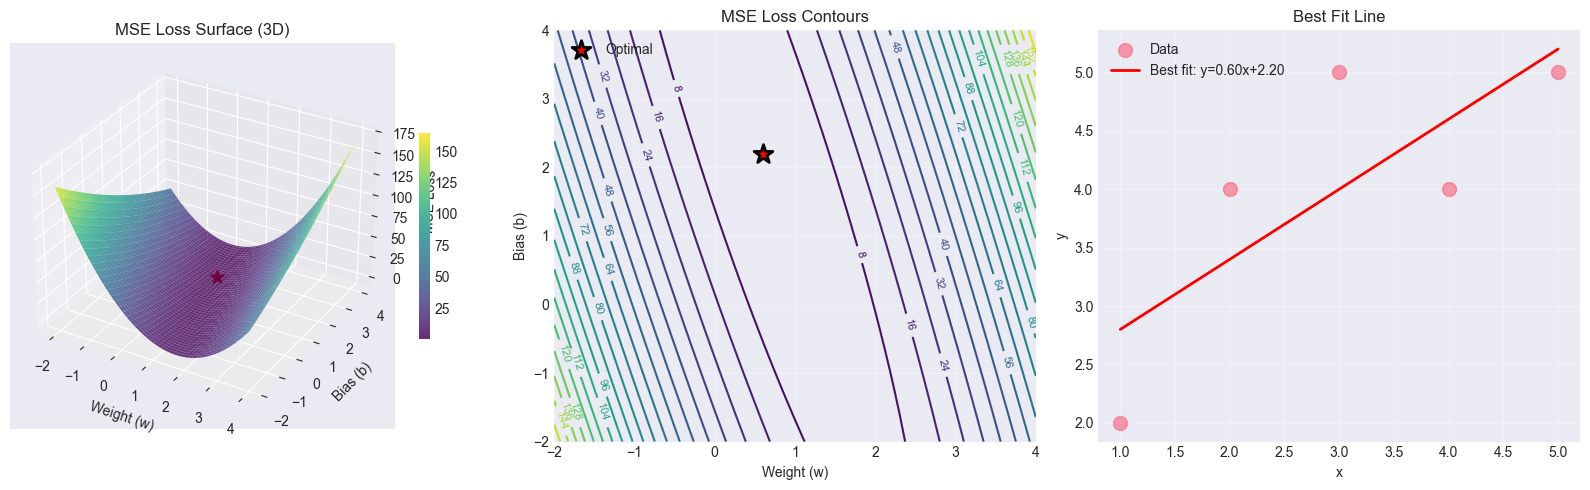

Key Observations:
• MSE loss surface is convex (bowl-shaped)
• Has a unique global minimum
• Any descent algorithm will find the optimal solution

Optimal parameters: w = 0.600, b = 2.200


In [9]:
# Visualize MSE loss surface
def plot_mse_surface():
    # Generate simple data
    X = np.array([1, 2, 3, 4, 5])
    y = np.array([2, 4, 5, 4, 5])
    
    # Create grid of w and b values
    w_range = np.linspace(-2, 4, 100)
    b_range = np.linspace(-2, 4, 100)
    W, B = np.meshgrid(w_range, b_range)
    
    # Compute MSE for each (w, b) pair
    MSE = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            y_pred = W[i, j] * X + B[i, j]
            MSE[i, j] = np.mean((y_pred - y)**2)
    
    # Optimal values
    w_opt = np.polyfit(X, y, 1)[0]
    b_opt = np.polyfit(X, y, 1)[1]
    
    # Plot
    fig = plt.figure(figsize=(16, 5))
    
    # 3D surface
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(W, B, MSE, cmap='viridis', alpha=0.8)
    ax1.scatter([w_opt], [b_opt], [np.mean((w_opt * X + b_opt - y)**2)], 
               color='red', s=100, marker='*', label='Optimal')
    ax1.set_xlabel('Weight (w)')
    ax1.set_ylabel('Bias (b)')
    ax1.set_zlabel('MSE Loss')
    ax1.set_title('MSE Loss Surface (3D)')
    plt.colorbar(surf, ax=ax1, shrink=0.5)
    
    # Contour plot
    ax2 = fig.add_subplot(132)
    contour = ax2.contour(W, B, MSE, levels=20, cmap='viridis')
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.scatter([w_opt], [b_opt], color='red', s=200, marker='*', 
               edgecolors='black', linewidths=2, label='Optimal', zorder=5)
    ax2.set_xlabel('Weight (w)')
    ax2.set_ylabel('Bias (b)')
    ax2.set_title('MSE Loss Contours')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Data and best fit
    ax3 = fig.add_subplot(133)
    ax3.scatter(X, y, s=100, alpha=0.7, label='Data')
    ax3.plot(X, w_opt * X + b_opt, 'r-', linewidth=2, 
            label=f'Best fit: y={w_opt:.2f}x+{b_opt:.2f}')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_title('Best Fit Line')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Key Observations:")
    print("• MSE loss surface is convex (bowl-shaped)")
    print("• Has a unique global minimum")
    print("• Any descent algorithm will find the optimal solution")
    print(f"\nOptimal parameters: w = {w_opt:.3f}, b = {b_opt:.3f}")

plot_mse_surface()

---
## 3. Closed-Form Solution (Normal Equation)

### Mathematical Derivation

To minimize MSE, we take the derivative and set it to zero:

$$\frac{\partial L}{\partial \mathbf{w}} = \frac{2}{n}\mathbf{X}^T(\mathbf{Xw} - \mathbf{y}) = 0$$

Solving for $\mathbf{w}$:
$$\mathbf{X}^T\mathbf{Xw} = \mathbf{X}^T\mathbf{y}$$

**Normal Equation:**
$$\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

### Advantages:
- ✅ **Exact solution**: No hyperparameters to tune
- ✅ **One-step**: No iterations needed
- ✅ **Guaranteed optimal**: Always finds global minimum

### Disadvantages:
- ❌ **Slow for large n or d**: $O(d^3)$ complexity for matrix inversion
- ❌ **Memory intensive**: Need to compute $\mathbf{X}^T\mathbf{X}$
- ❌ **Numerical issues**: Can be unstable if $\mathbf{X}^T\mathbf{X}$ is singular

=== TESTING CLOSED-FORM SOLUTION ===

True parameters: w = 3.0, b = 2.0
Learned parameters: w = 2.9642, b = 2.0037
R² score: 0.9924


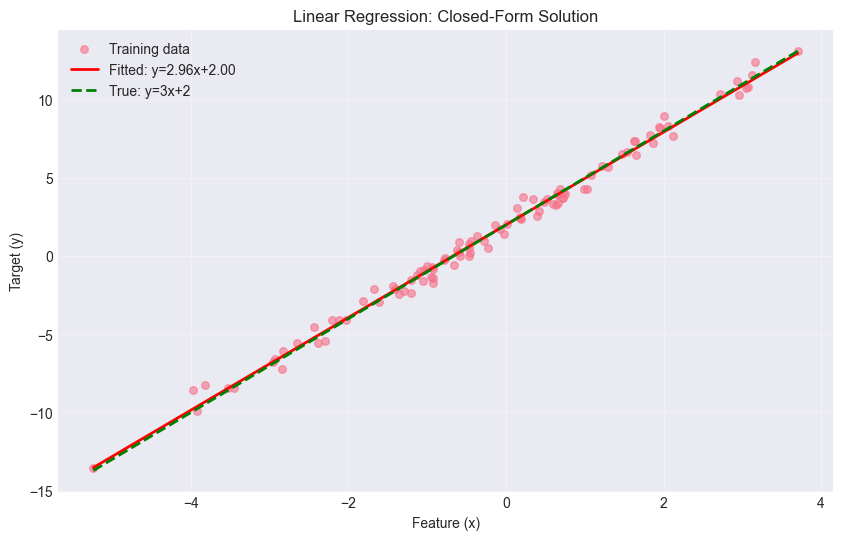


✓ Closed-form solution found optimal parameters in one step!


In [10]:
class LinearRegressionClosed:
    """
    Linear Regression using closed-form solution (Normal Equation)
    """
    
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        """
        Fit linear regression model using normal equation
        
        Args:
            X: feature matrix (n_samples, n_features)
            y: target vector (n_samples,)
        """
        # Add bias term (column of ones)
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        
        # Normal equation: w = (X^T X)^(-1) X^T y
        # Using numpy's lstsq for numerical stability
        w = np.linalg.lstsq(X_with_bias.T @ X_with_bias, 
                           X_with_bias.T @ y, 
                           rcond=None)[0]
        
        self.bias = w[0]
        self.weights = w[1:]
        
        return self
    
    def predict(self, X):
        """
        Make predictions
        
        Args:
            X: feature matrix (n_samples, n_features)
        
        Returns:
            predictions: (n_samples,)
        """
        return X @ self.weights + self.bias
    
    def score(self, X, y):
        """
        Compute R² score
        """
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        return 1 - (ss_res / ss_tot)

# Test on synthetic data
print("=== TESTING CLOSED-FORM SOLUTION ===")

# Generate data
np.random.seed(42)
X_train = np.random.randn(100, 1) * 2
y_train = 3 * X_train.squeeze() + 2 + np.random.randn(100) * 0.5

# Fit model
model_closed = LinearRegressionClosed()
model_closed.fit(X_train, y_train)

print(f"\nTrue parameters: w = 3.0, b = 2.0")
print(f"Learned parameters: w = {model_closed.weights[0]:.4f}, b = {model_closed.bias:.4f}")
print(f"R² score: {model_closed.score(X_train, y_train):.4f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.6, s=30, label='Training data')
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_line = model_closed.predict(X_line)
plt.plot(X_line, y_line, 'r-', linewidth=2, 
         label=f'Fitted: y={model_closed.weights[0]:.2f}x+{model_closed.bias:.2f}')
plt.plot(X_line, 3*X_line + 2, 'g--', linewidth=2, label='True: y=3x+2')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.title('Linear Regression: Closed-Form Solution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n✓ Closed-form solution found optimal parameters in one step!")

### Multiple Features Example

=== MULTIPLE FEATURES ===
Training set: (160, 5)
Test set: (40, 5)

Training R²: 0.9890
Test R²: 0.9902

Training MSE: 102.34
Test MSE: 85.06

Learned weights: [ 2.83386855 11.01451652 64.88463996 17.94510226 69.86671833]
Learned bias: 0.9732


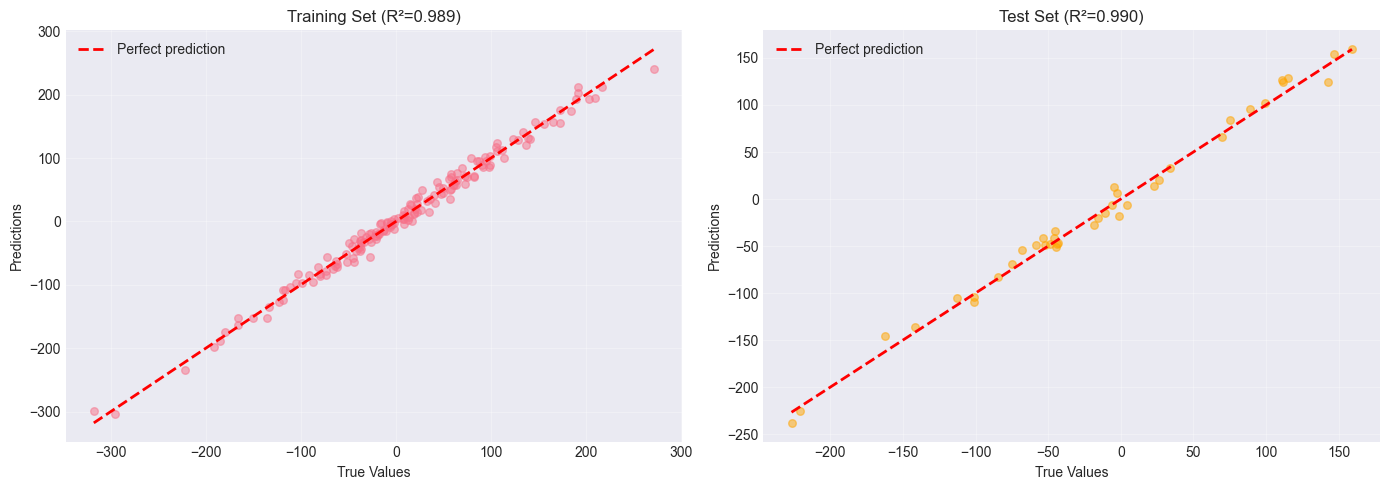

In [11]:
# Generate multi-feature data
X_multi, y_multi = make_regression(n_samples=200, n_features=5, 
                                   n_informative=5, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, 
                                                     test_size=0.2, random_state=42)

print("=== MULTIPLE FEATURES ===")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Fit model
model_multi = LinearRegressionClosed()
model_multi.fit(X_train, y_train)

# Evaluate
train_score = model_multi.score(X_train, y_train)
test_score = model_multi.score(X_test, y_test)

y_pred_train = model_multi.predict(X_train)
y_pred_test = model_multi.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"\nTraining R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")
print(f"\nTraining MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

print(f"\nLearned weights: {model_multi.weights}")
print(f"Learned bias: {model_multi.bias:.4f}")

# Plot predictions vs actual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training set
ax1.scatter(y_train, y_pred_train, alpha=0.5, s=30)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'r--', linewidth=2, label='Perfect prediction')
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predictions')
ax1.set_title(f'Training Set (R²={train_score:.3f})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Test set
ax2.scatter(y_test, y_pred_test, alpha=0.5, s=30, color='orange')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', linewidth=2, label='Perfect prediction')
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predictions')
ax2.set_title(f'Test Set (R²={test_score:.3f})')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 4. Gradient Descent Solution

### Iterative Optimization

Instead of computing the closed-form solution, we can use gradient descent:

**Update rule:**
$$\mathbf{w}_{new} = \mathbf{w}_{old} - \alpha \nabla L(\mathbf{w}_{old})$$

**Gradient of MSE:**
$$\nabla L(\mathbf{w}) = \frac{2}{n}\mathbf{X}^T(\mathbf{Xw} - \mathbf{y})$$

### Advantages:
- ✅ **Scalable**: Works for large datasets
- ✅ **Memory efficient**: No matrix inversion
- ✅ **Online learning**: Can update with new data
- ✅ **Flexible**: Easy to add regularization

### Disadvantages:
- ❌ **Hyperparameters**: Need to tune learning rate
- ❌ **Iterations**: Takes multiple steps to converge
- ❌ **Sensitive**: To feature scaling

In [12]:
class LinearRegressionGD:
    """
    Linear Regression using Gradient Descent
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tol = tol
        self.weights = None
        self.bias = None
        self.history = {'loss': [], 'weights': [], 'bias': []}
    
    def fit(self, X, y, verbose=False):
        """
        Fit linear regression using gradient descent
        
        Args:
            X: feature matrix (n_samples, n_features)
            y: target vector (n_samples,)
            verbose: print progress
        """
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Predictions
            y_pred = X @ self.weights + self.bias
            
            # Compute loss
            loss = np.mean((y_pred - y)**2)
            
            # Compute gradients
            dw = (2/n_samples) * (X.T @ (y_pred - y))
            db = (2/n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Store history
            self.history['loss'].append(loss)
            self.history['weights'].append(self.weights.copy())
            self.history['bias'].append(self.bias)
            
            # Check convergence
            if i > 0 and abs(self.history['loss'][-2] - loss) < self.tol:
                if verbose:
                    print(f"Converged at iteration {i}")
                break
            
            # Print progress
            if verbose and (i % 100 == 0 or i == self.n_iterations - 1):
                print(f"Iteration {i}: Loss = {loss:.6f}")
        
        return self
    
    def predict(self, X):
        return X @ self.weights + self.bias
    
    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        return 1 - (ss_res / ss_tot)

# Test gradient descent
print("=== GRADIENT DESCENT SOLUTION ===")

# Use same data as before
model_gd = LinearRegressionGD(learning_rate=0.1, n_iterations=1000)
model_gd.fit(X_train, y_train, verbose=True)

print(f"\nLearned parameters (GD): w = {model_gd.weights[0]:.4f}, b = {model_gd.bias:.4f}")
print(f"Learned parameters (Closed): w = {model_closed.weights[0]:.4f}, b = {model_closed.bias:.4f}")
print(f"\nR² score (GD): {model_gd.score(X_train, y_train):.4f}")
print(f"R² score (Closed): {model_closed.score(X_train, y_train):.4f}")

=== GRADIENT DESCENT SOLUTION ===
Iteration 0: Loss = 9396.084319
Converged at iteration 56

Learned parameters (GD): w = 2.8340, b = 0.9738
Learned parameters (Closed): w = 2.9642, b = 2.0037

R² score (GD): 0.9890


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 5)

### Visualizing Convergence

ValueError: x and y must be the same size

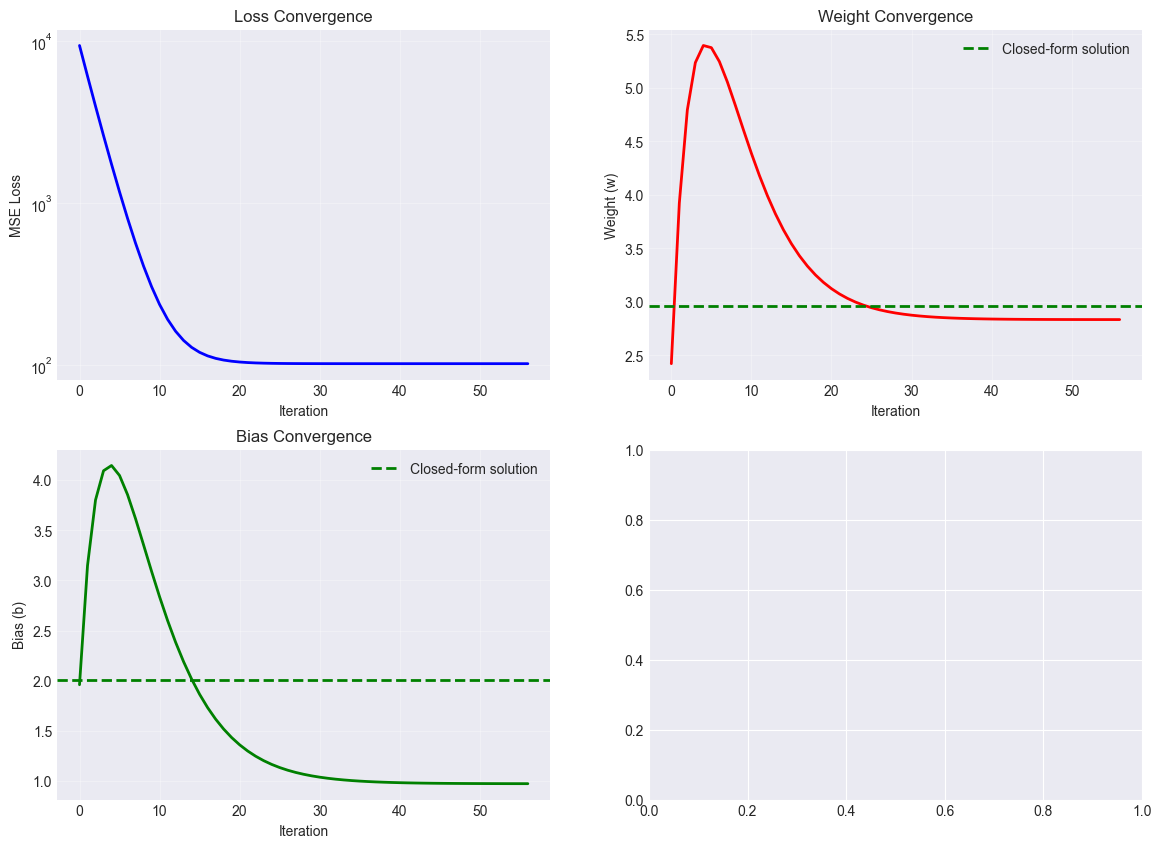

In [13]:
# Plot convergence
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loss over iterations
axes[0, 0].plot(model_gd.history['loss'], 'b-', linewidth=2)
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('MSE Loss')
axes[0, 0].set_title('Loss Convergence')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

# Weight convergence
weights_history = [w[0] for w in model_gd.history['weights']]
axes[0, 1].plot(weights_history, 'r-', linewidth=2)
axes[0, 1].axhline(y=model_closed.weights[0], color='green', 
                  linestyle='--', linewidth=2, label='Closed-form solution')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Weight (w)')
axes[0, 1].set_title('Weight Convergence')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Bias convergence
axes[1, 0].plot(model_gd.history['bias'], 'g-', linewidth=2)
axes[1, 0].axhline(y=model_closed.bias, color='green', 
                  linestyle='--', linewidth=2, label='Closed-form solution')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Bias (b)')
axes[1, 0].set_title('Bias Convergence')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Final fit
axes[1, 1].scatter(X_train, y_train, alpha=0.5, s=30, label='Data')
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_gd = model_gd.predict(X_line)
y_closed = model_closed.predict(X_line)
axes[1, 1].plot(X_line, y_gd, 'b-', linewidth=2, label='Gradient Descent')
axes[1, 1].plot(X_line, y_closed, 'r--', linewidth=2, label='Closed-form')
axes[1, 1].set_xlabel('Feature (x)')
axes[1, 1].set_ylabel('Target (y)')
axes[1, 1].set_title('Final Models (Nearly Identical)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("• Loss decreases exponentially")
print("• Parameters converge to closed-form solution")
print("• Both methods give nearly identical results")

### Learning Rate Impact

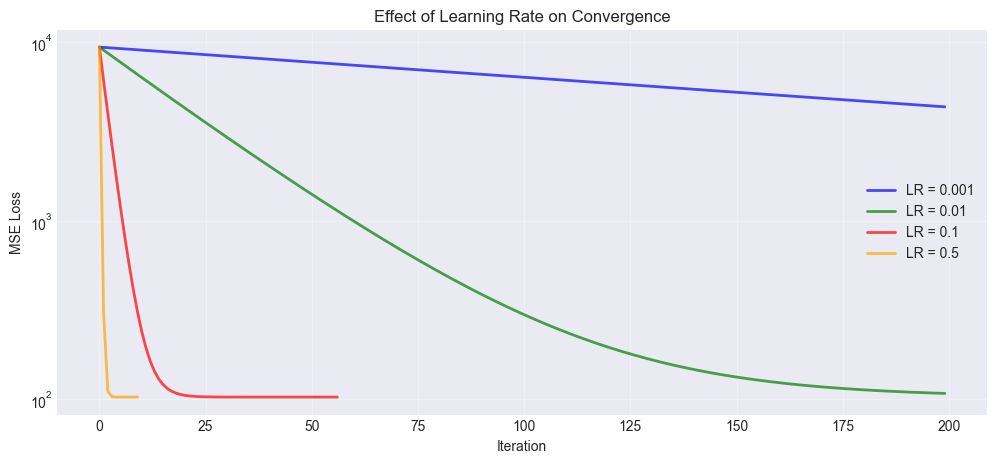

Learning Rate Guidelines:
• Too small (0.001): Slow convergence
• Good (0.01-0.1): Fast and stable
• Too large (0.5+): May oscillate or diverge


In [14]:
# Compare different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(12, 5))

for lr, color in zip(learning_rates, colors):
    model = LinearRegressionGD(learning_rate=lr, n_iterations=200)
    model.fit(X_train, y_train)
    
    plt.plot(model.history['loss'], color=color, linewidth=2, 
            label=f'LR = {lr}', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

print("Learning Rate Guidelines:")
print("• Too small (0.001): Slow convergence")
print("• Good (0.01-0.1): Fast and stable")
print("• Too large (0.5+): May oscillate or diverge")

---
## 5. Mini-batch and Stochastic Gradient Descent

=== COMPARING BATCH VARIANTS ===


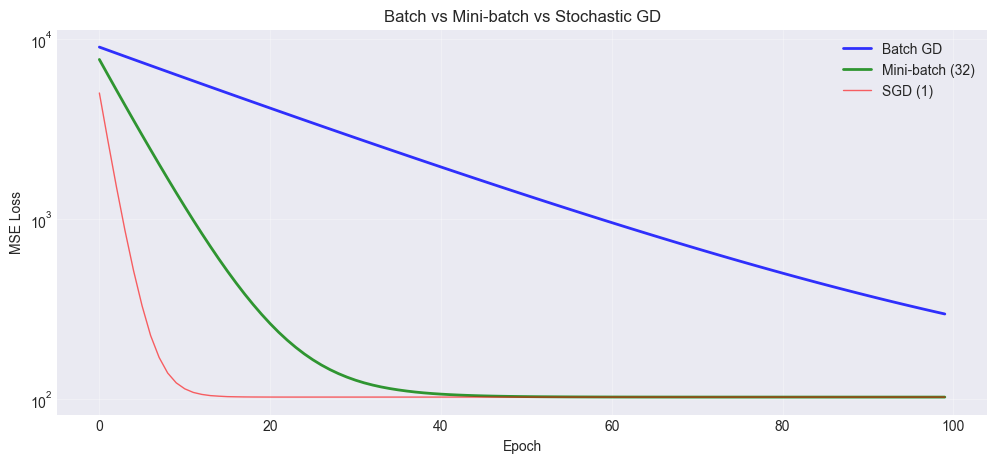


Key Differences:
• Batch GD: Smooth, uses all data per update
• Mini-batch: Good balance, most commonly used
• SGD: Noisy but can escape local minima


In [15]:
class LinearRegressionSGD:
    """
    Linear Regression with Mini-batch/Stochastic Gradient Descent
    """
    
    def __init__(self, learning_rate=0.01, n_epochs=100, batch_size=32):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.history = {'loss': []}
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training
        for epoch in range(self.n_epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            # Mini-batch gradient descent
            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]
                
                # Forward pass
                y_pred = X_batch @ self.weights + self.bias
                
                # Gradients
                batch_size_actual = len(X_batch)
                dw = (2/batch_size_actual) * (X_batch.T @ (y_pred - y_batch))
                db = (2/batch_size_actual) * np.sum(y_pred - y_batch)
                
                # Update
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            # Compute epoch loss
            y_pred_epoch = X @ self.weights + self.bias
            loss = np.mean((y_pred_epoch - y)**2)
            self.history['loss'].append(loss)
        
        return self
    
    def predict(self, X):
        return X @ self.weights + self.bias

# Compare batch, mini-batch, and SGD
print("=== COMPARING BATCH VARIANTS ===")

# Batch GD (batch_size = all data)
model_batch = LinearRegressionSGD(learning_rate=0.01, n_epochs=100, 
                                  batch_size=len(X_train))
model_batch.fit(X_train, y_train)

# Mini-batch GD
model_minibatch = LinearRegressionSGD(learning_rate=0.01, n_epochs=100, batch_size=32)
model_minibatch.fit(X_train, y_train)

# SGD (batch_size = 1)
model_sgd = LinearRegressionSGD(learning_rate=0.001, n_epochs=100, batch_size=1)
model_sgd.fit(X_train, y_train)

# Plot comparison
plt.figure(figsize=(12, 5))

plt.plot(model_batch.history['loss'], 'b-', linewidth=2, label='Batch GD', alpha=0.8)
plt.plot(model_minibatch.history['loss'], 'g-', linewidth=2, label='Mini-batch (32)', alpha=0.8)
plt.plot(model_sgd.history['loss'], 'r-', linewidth=1, label='SGD (1)', alpha=0.6)

plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Batch vs Mini-batch vs Stochastic GD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

print("\nKey Differences:")
print("• Batch GD: Smooth, uses all data per update")
print("• Mini-batch: Good balance, most commonly used")
print("• SGD: Noisy but can escape local minima")

---
## 6. Model Evaluation Metrics

### Common Metrics for Regression:

1. **Mean Squared Error (MSE)**
   $$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

2. **Root Mean Squared Error (RMSE)**
   $$RMSE = \sqrt{MSE}$$
   
3. **Mean Absolute Error (MAE)**
   $$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

4. **R² Score (Coefficient of Determination)**
   $$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$
   
   - R² = 1: Perfect fit
   - R² = 0: Model no better than predicting mean
   - R² < 0: Model worse than predicting mean

In [16]:
# Comprehensive evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Comprehensive model evaluation
    """
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    metrics = {
        'Model': model_name,
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred)
    }
    
    return metrics, y_train_pred, y_test_pred

# Evaluate both models
metrics_closed, y_train_pred_closed, y_test_pred_closed = evaluate_model(
    model_closed, X_train, y_train, X_train[:20], y_train[:20], 'Closed-Form'
)

metrics_gd, y_train_pred_gd, y_test_pred_gd = evaluate_model(
    model_gd, X_train, y_train, X_train[:20], y_train[:20], 'Gradient Descent'
)

# Display results
import pandas as pd
results_df = pd.DataFrame([metrics_closed, metrics_gd])
print("\n=== MODEL COMPARISON ===")
print(results_df.to_string(index=False))

# Residual analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Predictions vs Actual
axes[0, 0].scatter(y_train, y_train_pred_closed, alpha=0.5, s=30)
axes[0, 0].plot([y_train.min(), y_train.max()], 
               [y_train.min(), y_train.max()], 'r--', linewidth=2)
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Predictions vs Actual')
axes[0, 0].grid(True, alpha=0.3)

# Residuals vs Predicted
residuals = y_train - y_train_pred_closed
axes[0, 1].scatter(y_train_pred_closed, residuals, alpha=0.5, s=30)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Residual distribution
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Residual Distribution')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Analysis:")
print(f"Mean residual: {np.mean(residuals):.6f} (should be ~0)")
print(f"Std of residuals: {np.std(residuals):.4f}")
print("\nGood model characteristics:")
print("✓ Residuals centered around 0")
print("✓ Residuals roughly normally distributed")
print("✓ No clear pattern in residual plot")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 5)

---
## 7. Regularization: Ridge and Lasso

### Why Regularization?

**Problem**: Overfitting when we have many features or limited data

**Solution**: Add penalty term to discourage large weights

### Ridge Regression (L2 Regularization)

$$L_{ridge}(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2 + \lambda\sum_{j=1}^{d}w_j^2$$

Closed-form solution:
$$\mathbf{w}^* = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$$

### Lasso Regression (L1 Regularization)

$$L_{lasso}(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2 + \lambda\sum_{j=1}^{d}|w_j|$$

**Key difference**: Lasso can drive weights to exactly zero (feature selection!)

/Users/savithavijayarangan/miniconda3/lib/python3.13/site-packages/sklearn/base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/savithavijayarangan/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/savithavijayarangan/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.700e+03, tolerance: 2.530e+02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_

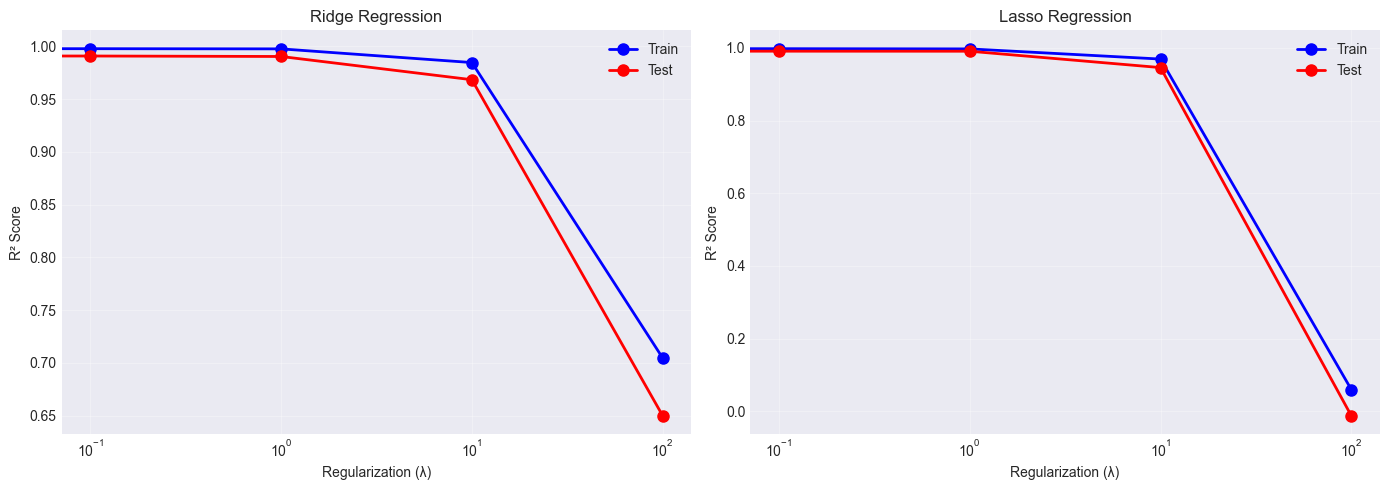

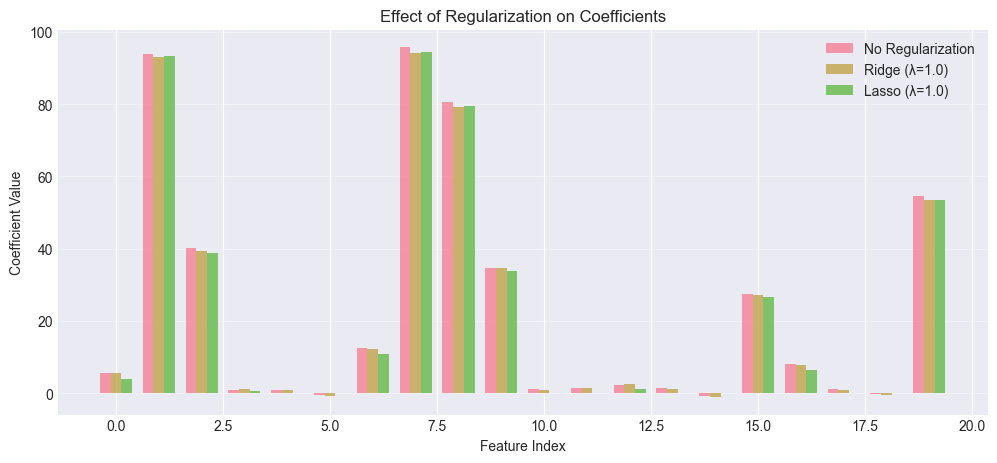

=== REGULARIZATION COMPARISON ===

No regularization:
  Non-zero coefficients: 20
  Max coefficient: 95.81

Ridge (λ=1.0):
  Non-zero coefficients: 20
  Max coefficient: 94.09

Lasso (λ=1.0):
  Non-zero coefficients: 14
  Max coefficient: 94.42

Key Insights:
• Ridge shrinks all coefficients but keeps all features
• Lasso can eliminate features (some coefficients = 0)
• Regularization reduces overfitting


In [17]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression as SklearnLR

# Generate data with many features (some irrelevant)
X_reg, y_reg = make_regression(n_samples=100, n_features=20, 
                               n_informative=10, noise=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Train models with different regularization
alphas = [0, 0.1, 1.0, 10.0, 100.0]

ridge_scores_train = []
ridge_scores_test = []
lasso_scores_train = []
lasso_scores_test = []

for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_reg, y_train_reg)
    ridge_scores_train.append(ridge.score(X_train_reg, y_train_reg))
    ridge_scores_test.append(ridge.score(X_test_reg, y_test_reg))
    
    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_reg, y_train_reg)
    lasso_scores_train.append(lasso.score(X_train_reg, y_train_reg))
    lasso_scores_test.append(lasso.score(X_test_reg, y_test_reg))

# Plot regularization effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ridge
axes[0].plot(alphas, ridge_scores_train, 'bo-', linewidth=2, markersize=8, label='Train')
axes[0].plot(alphas, ridge_scores_test, 'ro-', linewidth=2, markersize=8, label='Test')
axes[0].set_xlabel('Regularization (λ)')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Ridge Regression')
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Lasso
axes[1].plot(alphas, lasso_scores_train, 'bo-', linewidth=2, markersize=8, label='Train')
axes[1].plot(alphas, lasso_scores_test, 'ro-', linewidth=2, markersize=8, label='Test')
axes[1].set_xlabel('Regularization (λ)')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Lasso Regression')
axes[1].set_xscale('log')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare coefficient magnitudes
lr = SklearnLR().fit(X_train_reg, y_train_reg)
ridge_opt = Ridge(alpha=1.0).fit(X_train_reg, y_train_reg)
lasso_opt = Lasso(alpha=1.0, max_iter=10000).fit(X_train_reg, y_train_reg)

plt.figure(figsize=(12, 5))
x_pos = np.arange(20)
width = 0.25

plt.bar(x_pos - width, lr.coef_, width, label='No Regularization', alpha=0.7)
plt.bar(x_pos, ridge_opt.coef_, width, label='Ridge (λ=1.0)', alpha=0.7)
plt.bar(x_pos + width, lasso_opt.coef_, width, label='Lasso (λ=1.0)', alpha=0.7)

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Effect of Regularization on Coefficients')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.show()

print("=== REGULARIZATION COMPARISON ===")
print(f"\nNo regularization:")
print(f"  Non-zero coefficients: {np.sum(np.abs(lr.coef_) > 1e-10)}")
print(f"  Max coefficient: {np.max(np.abs(lr.coef_)):.2f}")

print(f"\nRidge (λ=1.0):")
print(f"  Non-zero coefficients: {np.sum(np.abs(ridge_opt.coef_) > 1e-10)}")
print(f"  Max coefficient: {np.max(np.abs(ridge_opt.coef_)):.2f}")

print(f"\nLasso (λ=1.0):")
print(f"  Non-zero coefficients: {np.sum(np.abs(lasso_opt.coef_) > 1e-10)}")
print(f"  Max coefficient: {np.max(np.abs(lasso_opt.coef_)):.2f}")

print("\nKey Insights:")
print("• Ridge shrinks all coefficients but keeps all features")
print("• Lasso can eliminate features (some coefficients = 0)")
print("• Regularization reduces overfitting")

---
## 8. Real-World Application: Boston Housing

Let's apply everything we've learned to a real dataset!

In [18]:
# Load diabetes dataset (alternative since Boston housing was removed)
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print("=== DIABETES DATASET ===")
print(f"Samples: {X_diabetes.shape[0]}")
print(f"Features: {X_diabetes.shape[1]}")
print(f"\nFeature names: {diabetes.feature_names}")
print(f"\nTarget: Disease progression after one year")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple models
models = {
    'Linear (Closed)': SklearnLR(),
    'Ridge (α=1)': Ridge(alpha=1.0),
    'Ridge (α=10)': Ridge(alpha=10.0),
    'Lasso (α=1)': Lasso(alpha=1.0, max_iter=10000),
    'Lasso (α=10)': Lasso(alpha=10.0, max_iter=10000)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    results.append({
        'Model': name,
        'Train R²': train_score,
        'Test R²': test_score,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Non-zero features': np.sum(np.abs(model.coef_) > 1e-10)
    })

# Display results
results_df = pd.DataFrame(results)
print("\n=== MODEL PERFORMANCE ===")
print(results_df.to_string(index=False))

# Visualize best model
best_model = models['Ridge (α=1)']
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training predictions
axes[0].scatter(y_train, y_pred_train, alpha=0.5, s=30)
axes[0].plot([y_train.min(), y_train.max()], 
            [y_train.min(), y_train.max()], 'r--', linewidth=2)
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title(f'Training Set (R²={results_df.loc[1, "Train R²"]:.3f})')
axes[0].grid(True, alpha=0.3)

# Test predictions
axes[1].scatter(y_test, y_pred_test, alpha=0.5, s=30, color='orange')
axes[1].plot([y_test.min(), y_test.max()], 
            [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1].set_xlabel('True Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title(f'Test Set (R²={results_df.loc[1, "Test R²"]:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance
plt.figure(figsize=(10, 6))
feature_importance = np.abs(best_model.coef_)
sorted_idx = np.argsort(feature_importance)[::-1]

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), 
          [diabetes.feature_names[i] for i in sorted_idx])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Ridge Regression)')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n=== INSIGHTS ===")
print("• Ridge regularization gives best test performance")
print("• Lasso performs feature selection (fewer non-zero coefficients)")
print("• Regularization prevents overfitting")
print("• Always evaluate on held-out test set!")

=== DIABETES DATASET ===
Samples: 442
Features: 10

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Target: Disease progression after one year


NameError: name 'pd' is not defined

---
## 9. Practice Exercises

### Exercise 1: Implement from Scratch
Implement both closed-form and gradient descent solutions for a simple dataset

In [ ]:
# Exercise 1 - Your code here
# Generate data: y = 5x + 3 + noise
# Implement and compare both methods


### Exercise 2: Feature Scaling Impact
Show how feature scaling affects gradient descent convergence

In [ ]:
# Exercise 2 - Your code here


### Exercise 3: Cross-Validation
Implement k-fold cross-validation to select optimal regularization parameter

In [ ]:
# Exercise 3 - Your code here


---
## 10. Key Takeaways

### Core Concepts:
1. ✅ **Linear regression** models linear relationships between features and target
2. ✅ **Two solutions**: Closed-form (fast, exact) and Gradient Descent (scalable)
3. ✅ **MSE loss**: Convex, differentiable, unique global minimum
4. ✅ **Regularization**: Ridge (L2) and Lasso (L1) prevent overfitting

### Formulas:
**Model:** $\hat{y} = \mathbf{w}^T\mathbf{x} + b$

**Loss:** $L = \frac{1}{n}\sum(\hat{y}_i - y_i)^2$

**Closed-form:** $\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

**Gradient:** $\nabla L = \frac{2}{n}\mathbf{X}^T(\mathbf{Xw} - \mathbf{y})$

### When to Use What:
- **Small datasets** → Closed-form solution
- **Large datasets** → Gradient descent or mini-batch GD
- **Many features** → Ridge or Lasso regularization
- **Feature selection needed** → Lasso (L1)

### Best Practices:
1. Always scale features before training
2. Split data: train/validation/test
3. Use regularization to prevent overfitting
4. Evaluate on test set only once
5. Check residual plots for model diagnostics
6. Consider polynomial features for non-linear relationships

---

**Congratulations! You understand linear regression! 🎉**

**This is the foundation for all supervised learning!**